## **ML Project Part 2 Problem 2**

#### **Import Libraries** 

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# IMPORT LIBRARIES

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.layers import Rescaling
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Convolution2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC
from scipy import ndimage
from collections import Counter
import pickle

In [4]:
# LOAD TEST AND TRAINING DATA

# Part 2
x_train_2 = np.load('/content/gdrive/MyDrive/ML/Data/Xtrain_Classification_Part2.npy')
y_train_2 = np.load('/content/gdrive/MyDrive/ML/Data/Ytrain_Classification_Part2.npy')
x_test_2 = np.load('/content/gdrive/MyDrive/ML/Data/Xtest_Classification_Part2.npy')

x_train_reshape = np.reshape(x_train_2,(len(x_train_2),50,50))
x_test_reshape = np.reshape(x_test_2,(len(x_test_2),50,50))
y_train_cat = to_categorical(y_train_2,num_classes=4)

division=round(0.8*len(y_train_2))

values, counts = np.unique(y_train_2, return_counts=True)
print('Classes Probability in ytrain:',counts/len(y_train_2))
values, counts = np.unique(y_train_2[:division], return_counts=True)
print('Classes Probability in Train until division:',counts/len(y_train_2[:division]))
values, counts = np.unique(y_train_2[division:], return_counts=True)
print('Classes Probability in Test after division:',counts/len(y_train_2[division:]))
del values, counts

Classes Probability in ytrain: [0.60792832 0.04629378 0.1816454  0.1641325 ]
Classes Probability in Train until division: [0.60919735 0.04581707 0.18038351 0.16460207]
Classes Probability in Test after division: [0.60285132 0.04820095 0.18669382 0.1622539 ]


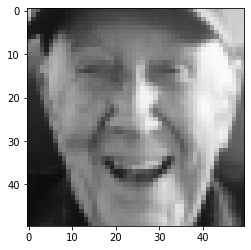

In [ ]:
# VISUALIZE DATA

data = x_train_2[division+26]
data_forimage = np.reshape(data,(50,50))
plt.imshow(data_forimage,cmap='gray', vmin=0, vmax=255)
plt.show()

#### **Convolutional Neural Network**

##### CNN Model 1- fairly decent 80.9 (report)

In [ ]:
#%% Create Layers

inputs = keras.Input(shape=(50, 50, 1),name='Input')

x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)


x = layers.Flatten(name='Flattening')(x)
x = layers.Dense(64, activation="relu", name="FC")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=50
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history1=model.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model.save('/content/gdrive/MyDrive/ML/Models/CNN1')


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_188 (Conv2D)         (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_189 (Conv2D)         (None, 22, 22, 8)         1160      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 11, 11, 8)        0         
 2D)                                                       

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/assets


balanced accuracy: 0.8097044831297102


In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN1')
# Predictions
ypred1 = model.predict(x_train_reshape[division:])
ypred1 = [np.argmax(i) for i in ypred1]
print('balanced accuracy:',balanced_accuracy_score(ypred1,y_train_2[division:]))

balanced accuracy: 0.8097044831297102


NameError: ignored

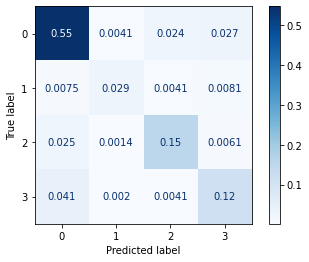

<Figure size 432x288 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred1)/len(ypred1),display_labels=['0','1','2','3']).plot(cmap='Blues')

#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/gdrive/MyDrive/ML/Images/Part2/CNN1_accuracy_evolution.eps",format='eps')
plt.show()
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/gdrive/MyDrive/ML/Images/Part2/CNN1_loss_evolution.eps",format='eps')
plt.show()

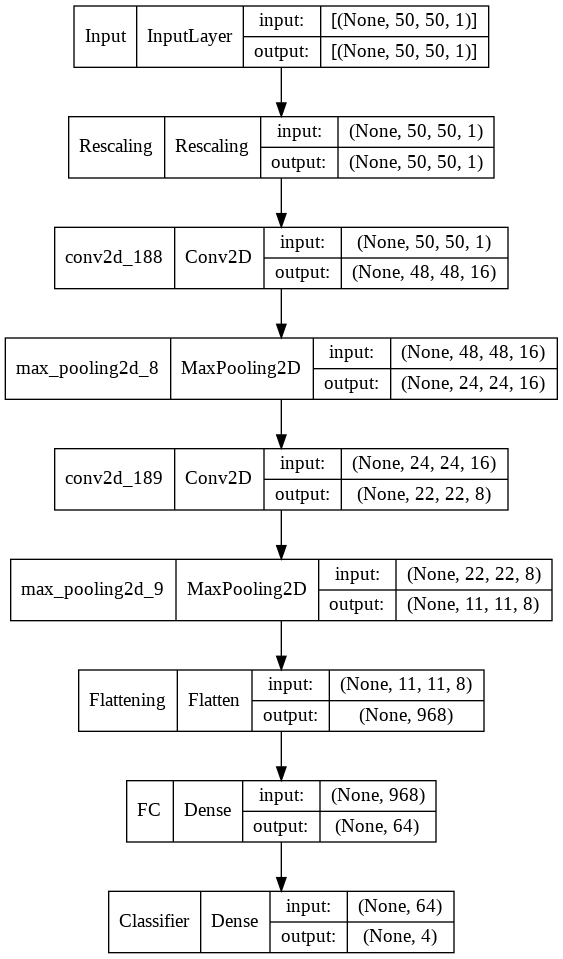

In [ ]:
plot_model(model, to_file='/content/gdrive/MyDrive/ML/Images/Part2/CNN_model_plot.png',show_shapes=True, show_layer_names=True)

##### CNN Model 2- Takes a lot of **time**

In [ ]:
#%% Method 2 - DONT RUN IT TAKES A LOT OF TIME
X_train=np.array([scipy.ndimage.zoom(image, 5, order=0) for image in x_train_reshape])

inputs = keras.Input(shape=(250, 250, 1),name='Input')

x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(5, 5), strides=2, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3),strides=2)(x)
x = layers.Conv2D(filters=16, kernel_size=(5, 5), strides=2, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)
x = layers.Conv2D(filters=8, kernel_size=(5, 5), strides=1, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)
#x = layers.Conv2D(filters=4, kernel_size=(5, 5), strides=1, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=(3, 3), strides=2)(x)

x = layers.Flatten(name='Flattening')(x)
x = layers.Dense(200, activation="relu", name="FC")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=250
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history=model.fit(X_train[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(X_train[division:], y_train_cat[division:]),callbacks=[callback])

# Predictions
ypred = model.predict(X_train[division:])
ypred = [np.argmax(i) for i in ypred]
print('balanced accuracy:',balanced_accuracy_score(ypred,y_train_2[division:]))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 250, 250, 1)]     0         
_________________________________________________________________
Rescaling (Rescaling)        (None, 250, 250, 1)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 123, 123, 32)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 16)        12816     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 8)         3208

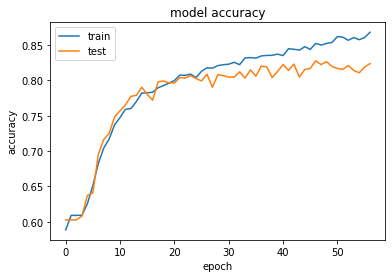

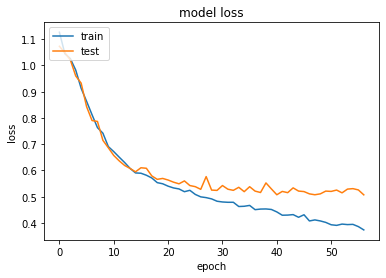

In [ ]:
#%% Plot accuracy and loss
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### CNN Model 3- nothing special model 72

In [ ]:
#%% Method 3- Modelo fixe

inputs = keras.Input(shape=(50, 50, 1),name='Input')

x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(3, 3),padding='same', activation="relu",use_bias=True)(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same',activation="relu",use_bias=True)(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)

x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(10, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
history=model.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_192 (Conv2D)         (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_193 (Conv2D)         (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                      

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN3/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN3/assets


balanced accuracy: 0.7226701755359113


balanced accuracy: 0.7226701755359113


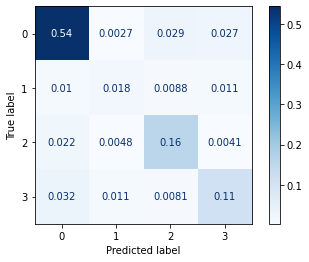

In [ ]:
model=keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN3')

# Predictions
ypred3 = model.predict(x_train_reshape[division:])
ypred3 = [np.argmax(i) for i in ypred3]
print('balanced accuracy:',balanced_accuracy_score(ypred3,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred3)/len(ypred3),display_labels=['0','1','2','3']).plot(cmap='Blues')


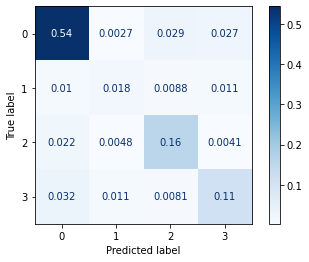

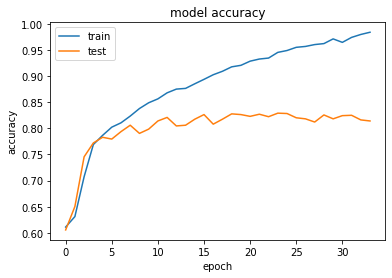

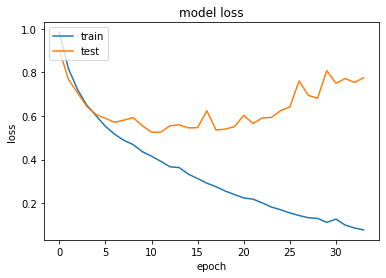

In [ ]:
#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Model 4 - meh, nada de especial 73

In [ ]:
# Create model
model4 = Sequential()
model4.add(Convolution2D(50,3,3,input_shape=(50,50,1), activation = 'relu'))
model4.add(Dropout(.1)) #to prevent overfitting
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Flatten())
model4.add(Dense(1024, activation = 'relu'))
model4.add(Dense(512, activation = 'relu'))
model4.add(Dense(4, activation = 'softmax'))

# Compile
model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

batch_size = 32
callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history = model4.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])

# Predictions
ypred4 = model4.predict(x_train_reshape[division:])
ypred4 = [np.argmax(i) for i in ypred4]
print('balanced accuracy:',balanced_accuracy_score(ypred4,y_train_2[division:]))

Epoch 1/100
185/185 [==============================] - 6s 28ms/step - loss: 1.3991 - accuracy: 0.6459 - val_loss: 0.3353 - val_accuracy: 0.7264
Epoch 2/100
185/185 [==============================] - 5s 27ms/step - loss: 0.3044 - accuracy: 0.7458 - val_loss: 0.3226 - val_accuracy: 0.7298
Epoch 3/100
185/185 [==============================] - 5s 28ms/step - loss: 0.2629 - accuracy: 0.7806 - val_loss: 0.3043 - val_accuracy: 0.7529
Epoch 4/100
185/185 [==============================] - 5s 28ms/step - loss: 0.2317 - accuracy: 0.8132 - val_loss: 0.2799 - val_accuracy: 0.7671
Epoch 5/100
185/185 [==============================] - 5s 28ms/step - loss: 0.2134 - accuracy: 0.8295 - val_loss: 0.2857 - val_accuracy: 0.7651
Epoch 6/100
185/185 [==============================] - 5s 27ms/step - loss: 0.1887 - accuracy: 0.8547 - val_loss: 0.3189 - val_accuracy: 0.7712
Epoch 7/100
185/185 [==============================] - 5s 27ms/step - loss: 0.1613 - accuracy: 0.8756 - val_loss: 0.3010 - val_accuracy:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


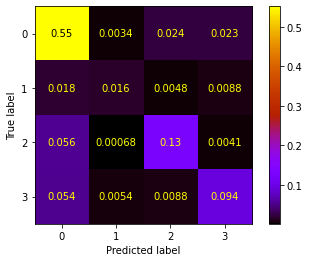

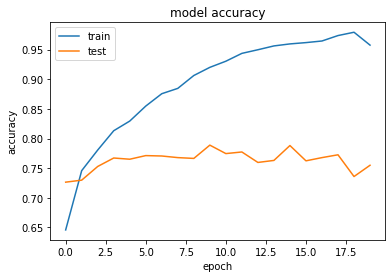

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


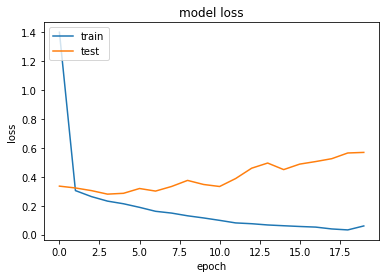

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred4)/len(ypred4),display_labels=['0','1','2','3']).plot(cmap='Blues')

#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/MyDrive/ML/Images/CNN/model4_accuracy.eps',format='eps')
plt.show()

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/MyDrive/ML/Images/CNN/model4_loss.eps',format='eps')
plt.show()

'/root'

##### CNN model 5 80.9

In [ ]:
#%% Method 5 - Very good

inputs = keras.Input(shape=(50, 50, 1),name='Input')

x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=16, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=8, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(50, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model5 = keras.Model(inputs=inputs, outputs=outputs)
model5.summary()

# Compile
model5.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history5=model5.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model5.save('/content/gdrive/MyDrive/ML/Models/CNN5')

# Predictions
ypred5 = model5.predict(x_train_reshape[division:])
ypred5 = [np.argmax(i) for i in ypred5]
print('balanced accuracy:',balanced_accuracy_score(ypred5,y_train_2[division:]))


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                       

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN5/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN5/assets


balanced accuracy: 0.8097741663083523


In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN5')

# Predictions
ypred5 = model.predict(x_train_reshape[division:])
ypred5 = [np.argmax(i) for i in ypred5]
print('balanced accuracy:',balanced_accuracy_score(ypred5,y_train_2[division:]))

balanced accuracy: 0.8097741663083523


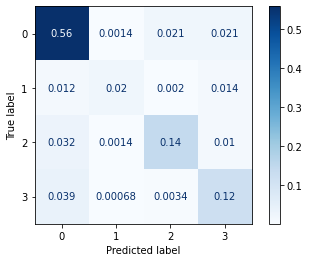

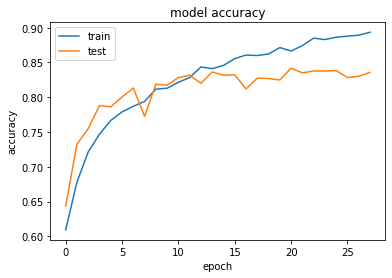

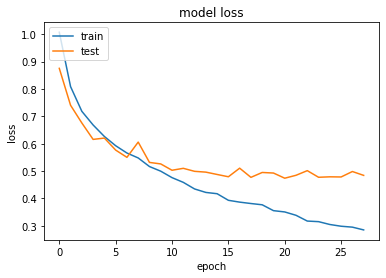

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred5)/len(ypred5),display_labels=['0','1','2','3']).plot(cmap='Blues')

#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/MyDrive/ML/Images/CNN/model5_accuracy.eps',format='eps')
plt.show()

# summarize history for loss
plt.figure()
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/MyDrive/ML/Images/CNN/model5_loss.eps',format='eps')
plt.show()

##### CNN 5.1 79

In [ ]:
#%% Method 5.1

inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=16, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=8, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)
x = layers.Dense(50, activation="relu")(x) 
num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history=model.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model.save('/content/gdrive/MyDrive/ML/Models/CNN5.1')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                         

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN5.1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN5.1/assets


balanced accuracy: 0.793056486021688


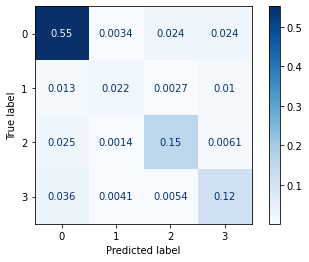

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN5.1')
# Predictions
ypred51 = model.predict(x_train_reshape[division:])
ypred51 = [np.argmax(i) for i in ypred51]
print('balanced accuracy:',balanced_accuracy_score(ypred51,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred51)/len(ypred51),display_labels=['0','1','2','3']).plot(cmap='Blues')


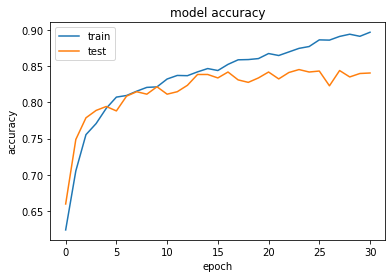

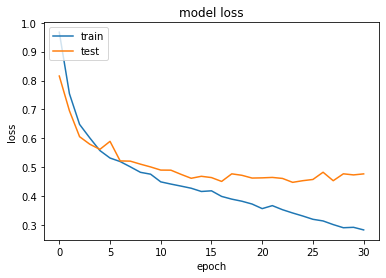

In [ ]:
#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### CNN 5.2 80.6

In [ ]:
#%% Method 5 - Very good

inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=16, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=8, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)
x = layers.Dense(50, activation="relu")(x) 
num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history=model.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model.save('/content/gdrive/MyDrive/ML/Models/CNN5.2')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                       

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN5.2/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN5.2/assets


balanced accuracy: 0.8067438862086557


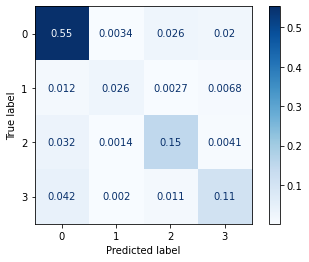

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN5.2')
# Predictions
ypred52 = model.predict(x_train_reshape[division:])
ypred52 = [np.argmax(i) for i in ypred52]
print('balanced accuracy:',balanced_accuracy_score(ypred52,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred52)/len(ypred52),display_labels=['0','1','2','3']).plot(cmap='Blues')

In [ ]:
#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### CNN 6 - Great 83

In [ ]:
#%% Method 6
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model6 = keras.Model(inputs=inputs, outputs=outputs)
model6.summary()

# Compile
model6.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history6=model6.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model6.save('/content/gdrive/MyDrive/ML/Models/CNN6')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                         

KeyboardInterrupt: ignored

balanced accuracy: 0.8314033425136658


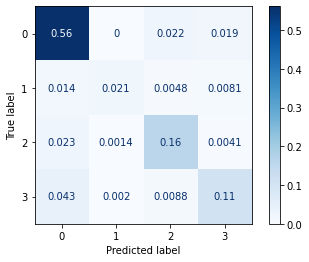

In [7]:
model6 = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN6')
# Predictions
ypred6 = model6.predict(x_train_reshape[division:])
ypred6 = [np.argmax(i) for i in ypred6]
print('balanced accuracy:',balanced_accuracy_score(ypred6,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred6)/len(ypred6),display_labels=['0','1','2','3']).plot(cmap='Blues')
plt.savefig("/content/gdrive/MyDrive/ML/Images/Part2/CNN6_confusionmatrix.eps",format='eps')
#plt.savefig(cm)

##### CNN 6.1 81.8

In [ ]:
#%% Method 6.1
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.2)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model6 = keras.Model(inputs=inputs, outputs=outputs)
model6.summary()

# Compile
model6.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history6=model6.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model6.save('/content/gdrive/MyDrive/ML/Models/CNN6.1')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                       

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN6.1/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN6.1/assets


balanced accuracy: 0.8181374379982731


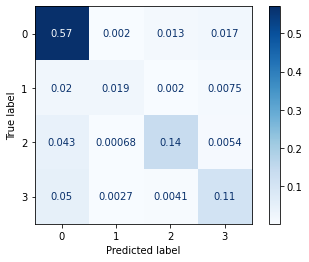

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN6.1')
# Predictions
ypred61 = model.predict(x_train_reshape[division:])
ypred61 = [np.argmax(i) for i in ypred61]
print('balanced accuracy:',balanced_accuracy_score(ypred61,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred61)/len(ypred61),display_labels=['0','1','2','3']).plot(cmap='Blues')

##### CNN 6.2 (test until great 83)

In [ ]:
#%% Method 6
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same', activation="relu",name='Conv2D_1')(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same',name='MaxPool2D_1')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu",name='Conv2D_2')(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same',name='MaxPool2D_2')(x)
x = layers.Dropout(0.3,name='Dropout')(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu",name='FC')(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model6 = keras.Model(inputs=inputs, outputs=outputs)
model6.summary()

# Compile
model6.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history6=model6.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])

# Save
model6.save('/content/gdrive/MyDrive/ML/Models/CNN6_img')
np.save('/content/gdrive/MyDrive/ML/Models/CNN6_img/history.npy',history6.history)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 Conv2D_1 (Conv2D)           (None, 50, 50, 32)        832       
                                                                 
 MaxPool2D_1 (MaxPooling2D)  (None, 25, 25, 32)        0         
                                                                 
 Conv2D_2 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 MaxPool2D_2 (MaxPooling2D)  (None, 13, 13, 16)        0         
                                                                 
 Dropout (Dropout)           (None, 13, 13, 16)        0   

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN6_img/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN6_img/assets


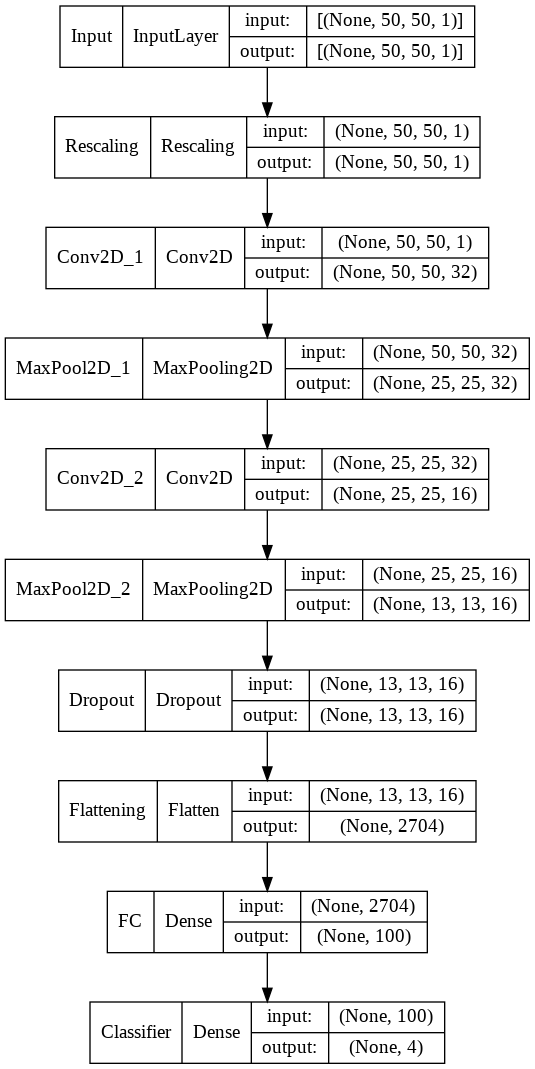

In [ ]:
plot_model(model6, to_file='/content/gdrive/MyDrive/ML/Images/CNN_model_final.png',show_shapes=True, show_layer_names=True)

balanced accuracy: 0.7990709492967012


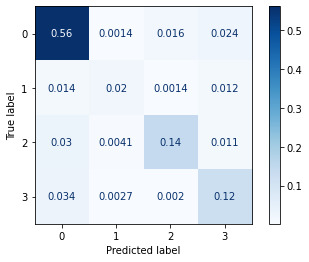

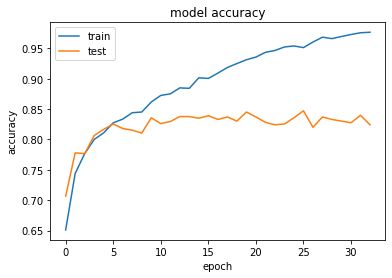

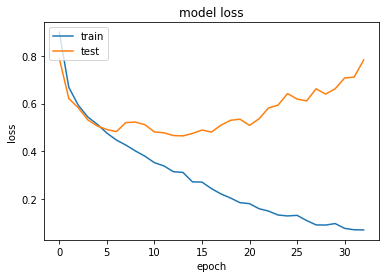

In [ ]:
history=np.load('/content/gdrive/MyDrive/ML/Models/CNN6.2/history.npy',allow_pickle='TRUE').item()
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN6.2')

# Predictions
ypred61 = model.predict(x_train_reshape[division:])
ypred61 = [np.argmax(i) for i in ypred61]
print('balanced accuracy:',balanced_accuracy_score(ypred61,y_train_2[division:]))

ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred61)/len(ypred61),display_labels=['0','1','2','3']).plot(cmap='Blues')

#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### CNN 6.3

In [ ]:
#%% Method 6.1
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.4)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model63 = keras.Model(inputs=inputs, outputs=outputs)
model63.summary()

# Compile
model63.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history6=model63.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model63.save('/content/gdrive/MyDrive/ML/Models/CNN6.3')
np.save('/content/gdrive/MyDrive/ML/Models/CNN6.3/history.npy',history6.history)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                       

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN6.3/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN6.3/assets


balanced accuracy: 0.8242002010036694


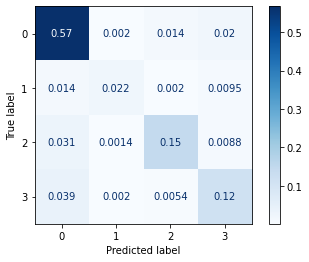

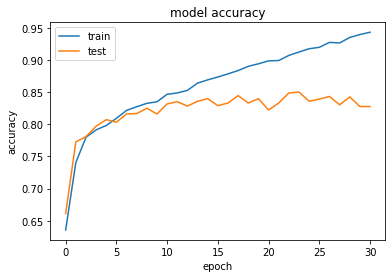

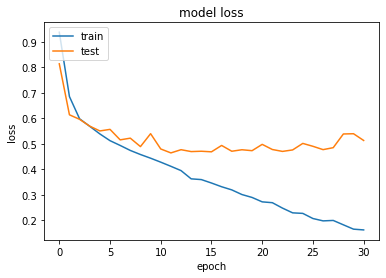

In [ ]:
history=np.load('/content/gdrive/MyDrive/ML/Models/CNN6.3/history.npy',allow_pickle='TRUE').item()
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN6.3')

# Predictions
ypred63 = model.predict(x_train_reshape[division:])
ypred63 = [np.argmax(i) for i in ypred63]
print('balanced accuracy:',balanced_accuracy_score(ypred63,y_train_2[division:]))

ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred63)/len(ypred63),display_labels=['0','1','2','3']).plot(cmap='Blues')

#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### CNN7 79.8

In [ ]:
#%% Method 7
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=64, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model6 = keras.Model(inputs=inputs, outputs=outputs)
model6.summary()

# Compile
model6.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history6=model6.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model6.save('/content/gdrive/MyDrive/ML/Models/CNN7')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                         

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN7/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN7/assets


balanced accuracy: 0.7980509854557589


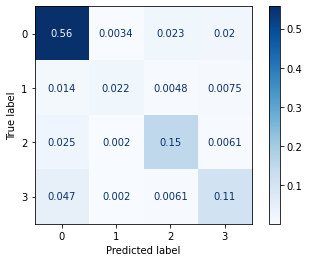

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN7')
# Predictions
ypred7 = model.predict(x_train_reshape[division:])
ypred7 = [np.argmax(i) for i in ypred7]
print('balanced accuracy:',balanced_accuracy_score(ypred7,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred7)/len(ypred7),display_labels=['0','1','2','3']).plot(cmap='Blues')

##### CNN8 79.8

In [ ]:
#%% Method 8
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.LocallyConnected2D(filters=32, kernel_size=(5, 5), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model8 = keras.Model(inputs=inputs, outputs=outputs)
model8.summary()

# Compile
model8.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history=model8.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model8.save('/content/gdrive/MyDrive/ML/Models/CNN8')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 locally_connected2d_1 (Loca  (None, 46, 46, 32)       1760512   
 llyConnected2D)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 16)       0   

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN8/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN8/assets


balanced accuracy: 0.7980509854557589


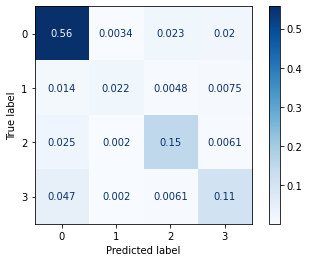

In [ ]:
model8 = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN8')
# Predictions
ypred8 = model.predict(x_train_reshape[division:])
ypred8 = [np.argmax(i) for i in ypred8]
print('balanced accuracy:',balanced_accuracy_score(ypred8,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred8)/len(ypred8),display_labels=['0','1','2','3']).plot(cmap='Blues')

##### CNN9 78.0

In [ ]:
#%% Method 9 (spatial dropout 2D)
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.SpatialDropout2D(0.3)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history=model.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model.save('/content/gdrive/MyDrive/ML/Models/CNN9')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                         

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN9/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN9/assets


balanced accuracy: 0.7806877409902192


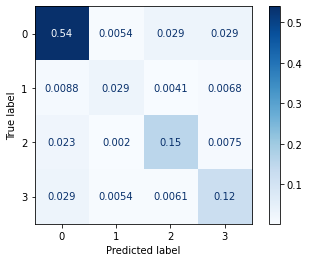

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN9')
# Predictions
ypred9 = model.predict(x_train_reshape[division:])
ypred9 = [np.argmax(i) for i in ypred9]
print('balanced accuracy:',balanced_accuracy_score(ypred9,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred9)/len(ypred9),display_labels=['0','1','2','3']).plot(cmap='Blues')

##### CNN10 78.0


In [ ]:
#%% Method 10 (gaussian dropout 2D)
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.GaussianDropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history=model.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model.save('/content/gdrive/MyDrive/ML/Models/CNN10')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                       

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN10/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN10/assets


balanced accuracy: 0.7806877409902192


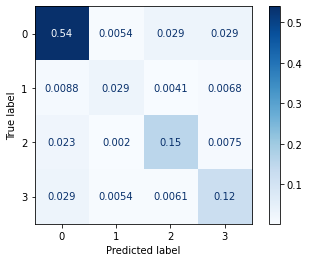

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN9')
# Predictions
ypred10 = model.predict(x_train_reshape[division:])
ypred10 = [np.argmax(i) for i in ypred10]
print('balanced accuracy:',balanced_accuracy_score(ypred10,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred10)/len(ypred10),display_labels=['0','1','2','3']).plot(cmap='Blues')

##### CNN11

In [ ]:
# Data Augmentation
x_train = x_train_reshape[:division].reshape(5893,50,50,1)
y_train = y_train_cat[:division]
x_test = x_train_reshape[division:].reshape(1473,50,50,1)
y_test = y_train_cat[division:]

# create image data augmentation generator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)
model6.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)

model.fit(datagen.flow(x_train, y_train, batch_size=32),
         validation_data=(x_test,y_test),
         epochs=100,callbacks=[callback])


In [ ]:

for img in range(len(train)):
  data = np.expand_dims(train[img].reshape(50,50,1),0) # expand dimension to one sample
  it = datagen.flow(data, batch_size=1)
  batch = it.next()
  x_train_aug[img] = batch[0].astype('uint8')

(1, 5893, 50, 50)

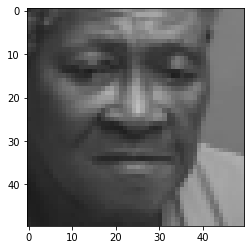

In [ ]:
data = x_train_2[10]
data_forimage = np.reshape(data,(50,50))
plt.imshow(data_forimage,cmap='gray', vmin=0, vmax=255)
plt.show()

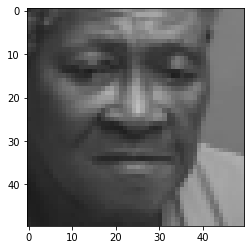

In [ ]:
data = x_train_aug[10]
data_forimage = np.reshape(data,(50,50))
plt.imshow(data_forimage,cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
# test

# load the image
img = load_img('/content/gdrive/MyDrive/ML/bird.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
print(samples.shape)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(15,15))
for i in range(9):
	batch = it.next()
	image = batch[0].astype('uint8')
plt.show()

(1, 399, 640, 3)


<Figure size 1080x1080 with 0 Axes>

In [ ]:
#%% Method 11 (data augmentation)
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.GaussianDropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)

x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history=model.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model.save('/content/gdrive/MyDrive/ML/Models/CNN10')

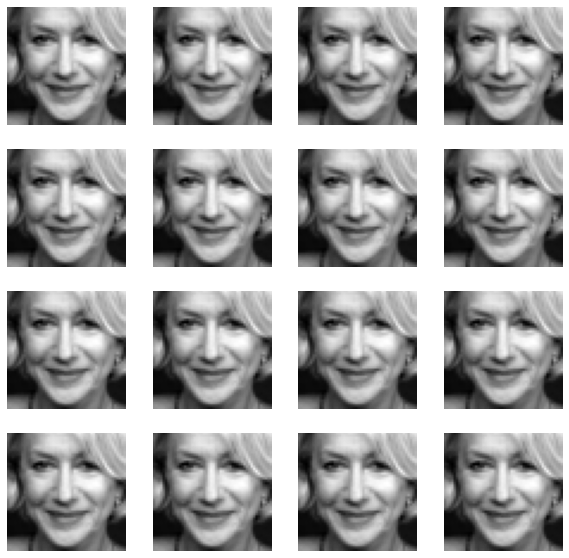

In [ ]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip(mode='vertical'),
     #layers.experimental.preprocessing.RandomRotation(20)
     ])

image = tf.expand_dims(x_train_reshape[2], 0)

plt.figure(figsize=(10, 10))

for i in range(16):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(augmented_image[0],cmap='gray')
  plt.axis("off")

##### **CNN12**

In [ ]:
#%% Method 12 
inputs = keras.Input(shape=(50, 50, 1),name='Input')
x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=128, kernel_size=(7, 7),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=(5, 5),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten(name='Flattening')(x)
x = layers.Dense(100, activation="relu")(x) 

num_classes = 4
outputs = layers.Dense(num_classes, activation="softmax", name='Classifier')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=32
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True)
history=model.fit(x_train_reshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(x_train_reshape[division:], y_train_cat[division:]),callbacks=[callback])
model.save('/content/gdrive/MyDrive/ML/Models/CNN12')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       6400      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        204864    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                       

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN12/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/ML/Models/CNN12/assets


balanced accuracy: 0.796680047365102


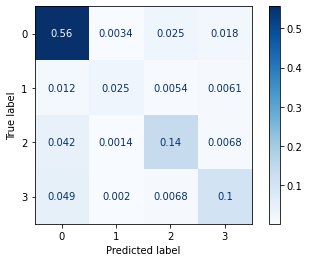

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN12')
# Predictions
ypred12 = model.predict(x_train_reshape[division:])
ypred12 = [np.argmax(i) for i in ypred12]
print('balanced accuracy:',balanced_accuracy_score(ypred12,y_train_2[division:]))
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypred12)/len(ypred12),display_labels=['0','1','2','3']).plot(cmap='Blues')

#### **Multilayer Perceptron**

In [ ]:
num_classes = 4
X_train = x_train_2
X_test = x_test_2
# Convert target classes to categorical ones
Y_train = y_train_cat

# Set the input shape
input_shape = (2500,)
#print(f'Feature shape: {input_shape}')

# Create model
MLP_model = Sequential()
MLP_model.add(Dense(1300, input_shape=input_shape, activation='relu'))
MLP_model.add(Dense(500, activation='relu'))
MLP_model.add(Dense(200, activation='relu'))
MLP_model.add(Dense(50, activation='relu'))
MLP_model.add(Dense(num_classes, activation='softmax'))
MLP_model.summary()
# Configure the model and start training
MLP_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size=50
MLP_callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
history = MLP_model.fit(X_train[0:division], Y_train[0:division],batch_size=batch_size, epochs=100, validation_data=(X_train[division:], Y_train[division:]),callbacks=[MLP_callback])

ypredmlp = MLP_model.predict(X_train[division:])
ypredmlp = [np.argmax(i) for i in ypredmlp]
print('balanced accuracy:',balanced_accuracy_score(ypredmlp,y_train_2[division:]))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1300)              3251300   
                                                                 
 dense_7 (Dense)             (None, 500)               650500    
                                                                 
 dense_8 (Dense)             (None, 200)               100200    
                                                                 
 dense_9 (Dense)             (None, 50)                10050     
                                                                 
 dense_10 (Dense)            (None, 4)                 204       
                                                                 
Total params: 4,012,254
Trainable params: 4,012,254
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
118/118 [=========================

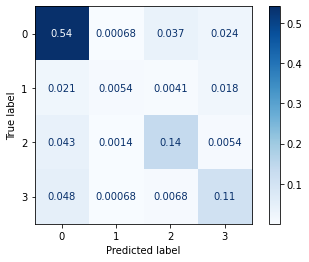

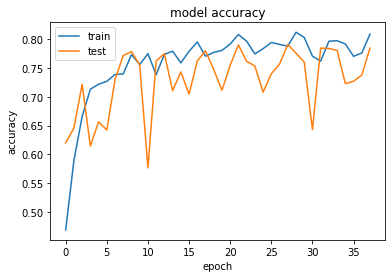

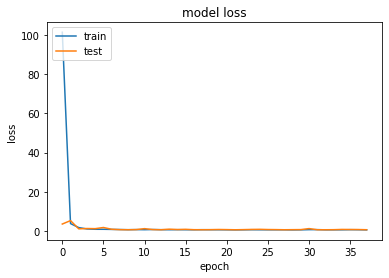

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],ypredmlp)/len(ypredmlp),display_labels=['0','1','2','3']).plot(cmap='Blues')

#%% Plot accuracy and loss
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/gdrive/MyDrive/ML/Images/Part2/MLP_accuracy_evolution.eps",format='eps')
plt.show()
# summarize history for loss
plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/gdrive/MyDrive/ML/Images/Part2/MLP_loss_evolution.eps",format='eps')
plt.show()

#### **Support Vector Machine** 80.5

In [ ]:
from sklearn.svm import SVC
results=[]
for kernel in ['linear', 'rbf', 'poly']:
  for gamma in ['auto','scale']:
    #for C in [1,5,10,20,30]:
    SVCmodel = SVC(kernel=kernel,gamma=gamma)
    SVCmodel.fit(x_train_2[0:division],y_train_2[0:division])
    ypredsvm = SVCmodel.predict(x_train_2[division:])
    results.append([kernel,gamma,1,balanced_accuracy_score(ypredsvm,y_train_2[division:])])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [ ]:
# best overall
m = 0
ind = 0
for i in range(len(results)):
    if float(results[i][-1]) > m:
        m = float(results[i][-1])
        ind = i
print('best:', results[ind])

best: ['rbf', 'scale', 1, 0.8052884659308603]


In [ ]:
# Save best model
from sklearn.svm import SVC
SVC2 = SVC(kernel='rbf',gamma='scale',random_state=0)
SVC2.fit(x_train_2[0:division],y_train_2[0:division])

filename = '/content/gdrive/MyDrive/ML/Models/SVM.sav'
pickle.dump(SVC2, open(filename, 'wb'))

balanced accuracy: 0.8052884659308603
              precision    recall  f1-score   support

         0.0       0.78      0.94      0.86       888
         1.0       0.86      0.17      0.28        71
         2.0       0.87      0.63      0.73       275
         3.0       0.71      0.56      0.63       239

    accuracy                           0.79      1473
   macro avg       0.81      0.57      0.62      1473
weighted avg       0.79      0.79      0.77      1473



In [ ]:
SVC2 = pickle.load(open('/content/gdrive/MyDrive/ML/Models/SVM.sav', 'rb'))
ypredsvm = SVC2.predict(x_train_2[division:])
print('balanced accuracy:',balanced_accuracy_score(ypredsvm,y_train_2[division:]))


balanced accuracy: 0.8052884659308603


#### **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=10,n_estimators=1000)
clf.fit(x_train_2[0:division],y_train_2[0:division])

filename = '/content/gdrive/MyDrive/ML/Models/clf.sav'
pickle.dump(clf, open(filename, 'wb'))

balanced accuracy: 0.8301358595811483


In [ ]:
clf = pickle.load(open('/content/gdrive/MyDrive/ML/Models/clf.sav', 'rb'))
ypredrf = clf.predict(x_train_2[division:])
print('balanced accuracy:',balanced_accuracy_score(ypredrf,y_train_2[division:]))

balanced accuracy: 0.8301358595811483


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=500)
ypredknn=neigh.fit(x_train_2[:division], y_train_2[:division]).predict(x_train_2[division:])
print('balanced accuracy:',balanced_accuracy_score(ypredknn,y_train_2[division:]))

balanced accuracy: 0.8016304347826086


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


#### Voting

In [ ]:
def choose(*args):
  result=np.empty((len(args[0]),1))
  for i in range(len(args[0])):
    lst=[y[i] for y in args]
    result[i]=max(set(lst), key=lst.count)
  return [int(result[i]) for i in range(len(result))]

In [ ]:
print('balanced accuracy:',balanced_accuracy_score(choose(ypred6,ypredrf,ypredknn,ypredsvm,ypred63),y_train_2[division:]))

balanced accuracy: 0.8942526807110139


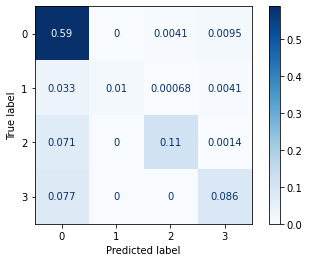

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_train_2[division:],choose(ypred6,ypredrf,ypredknn,ypredsvm,ypred63))/len(ypred6),display_labels=['0','1','2','3']).plot(cmap='Blues')

#### Make final prediction

In [ ]:
# Save final prediction
model6 = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN6')
ypred6final = model6.predict(x_test_reshape)
ypred6final = np.array([np.argmax(i) for i in ypred6final])

model63 = keras.models.load_model('/content/gdrive/MyDrive/ML/Models/CNN6.3')
ypred63final = model63.predict(x_test_reshape)
ypred63final = np.array([np.argmax(i) for i in ypred63final])

ypredknnfinal=neigh.fit(x_train_2[:division], y_train_2[:division]).predict(x_test_2)

clffinal = pickle.load(open('/content/gdrive/MyDrive/ML/Models/clf.sav', 'rb'))
ypredrffinal = clffinal.predict(x_test_2)

SVCfinal = pickle.load(open('/content/gdrive/MyDrive/ML/Models/SVM.sav', 'rb'))
ypredsvmfinal = SVCfinal.predict(x_test_2)

ypredfinalissimo=choose(ypred6final,ypredrffinal,ypredknnfinal,ypredsvmfinal,ypred63final)

In [ ]:
np.save('/content/gdrive/MyDrive/ML/ypred_part2.npy',ypredfinalissimo)

In [ ]:
yprediction=np.load('/content/gdrive/MyDrive/ML/ypred_part2.npy')

In [ ]:
np.shape(yprediction)

(1290,)

In [ ]:
np.shape(x_test_2)

(1290, 2500)

In [ ]:
y=np.load('/content/gdrive/MyDrive/ML/ypred_classification_part2.npy')

In [ ]:
print(y)